# <center> Prediction of Car Accident Severity</center>

## 1. Problem Statement

According to the estimation from the National Safety Council, nearly 38,800 people died from car accidents in 2019, while 4.4 million people were injured seriously. That is to say, there are approximately 9 people are injured by car accident every minute. If we can find out which factors contribute to accidents more so than others, we would drive more carefully when those factors are bad. If we know we have a high risk of getting into a serious car accident, then we might change our travel plan. Machine learning can help us on this problem. 

## 2. Data Understanding

A USA countrywide traffic accident dataset will be used on this analysis. This dataset includes car accident data of 49 states since 2016, which is collected from several reliable sources, such as the US and state departments of transpotation, law enforcement agencies, traffic cameras, and traffice sensors. This dataset contains 4 main features of a car accident, which are accident information, location, weather conditon, road condition. 


## 3. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Maiyongkai\Desktop\Data Science\US_Accidents_June20.csv')
print("The shape of data is:",(df.shape))
df.head()

The shape of data is: (3513617, 49)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


### 3.1. Check Data Source

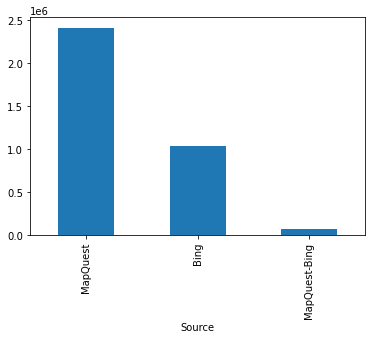

In [3]:
df.groupby('Source').size().sort_values(ascending = False).plot(kind = 'bar')

Most of the data is reported from MapQuest. In case Bing has different standard of identifying the accident severity than MapQuest, this project will only use data reported from MapQuest. 

In [4]:
df = df.loc[df['Source'] == 'MapQuest']
df = df.drop(['Source'], axis = 1)

### 3.2. Check Missing Values

Text(0.5, 1.0, 'Features That Have Missing Value with Missing Precentage')

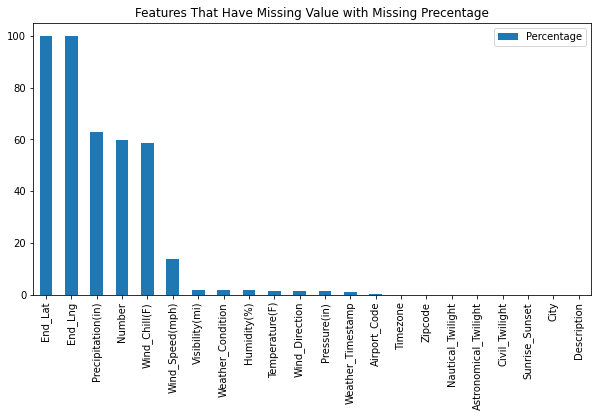

In [5]:
missing_values= df.isnull().sum().sort_values(ascending = False)
missing_values_percentage = missing_values.transform(lambda x: x/df.shape[0]*100)
df_miss_value = pd.DataFrame(missing_values_percentage)
df_miss_value.columns = [ 'Percentage']
df_miss_value = df_miss_value[df_miss_value ['Percentage'] > 0]
df_miss_value.plot(kind = 'bar',figsize=(10,5))
plt.title('Features That Have Missing Value with Missing Precentage')

Latitude and longitude of end point of accident location are important because latitude and logitude of start point are known. Feature should be dropped if more than 50 percent of its values are missing.  

In [6]:
dropfeatures = [ 'End_Lat', 'End_Lng', 'Precipitation(in)', 'Number', 'Wind_Chill(F)']

df = df.drop(dropfeatures, axis = 1)

### 3.3. Check Deversity in Features

In [7]:
# unique count of features
for i in df.columns:
    if df[i].unique().size == 1:
        print(i,df[i].unique().size)

Country 1
Turning_Loop 1


In [8]:
df = df.drop(['Country','Turning_Loop'], axis = 1)

### 3.4. Roughly Check Relationship Between Location/Time and Number of Accidents

Text(0, 0.5, 'Number of Accidents')

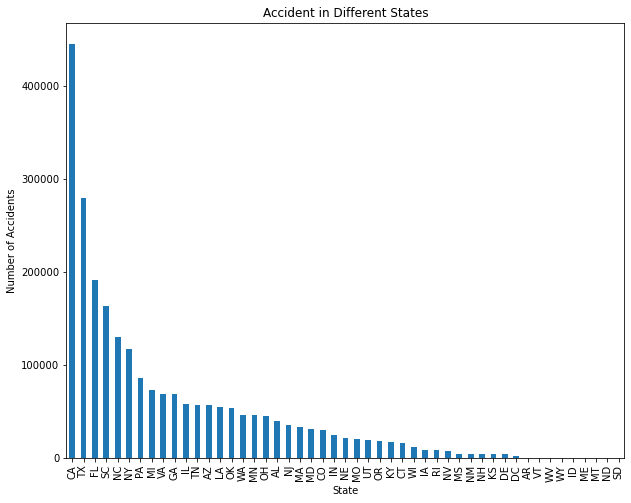

In [9]:
df.groupby('State').size().sort_values(ascending = False).plot(kind = 'bar', figsize = (10,8))
plt.title('Accident in Different States')
plt.xlabel('State')
plt.ylabel('Number of Accidents')


Figure above shows that accidents have relationship with location. Some states have more car accidents than others. 

#### Convert datatime

In [10]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.month
df['Dayofmonth']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['DayofWeek']=df['Start_Time'].dt.dayofweek # 0 is Monday
df = df.drop('Start_Time',axis = 1)

Text(0, 0.5, 'Number of Accidents')

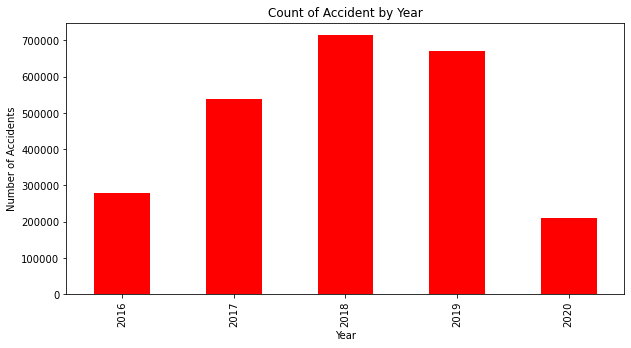

In [11]:
df.groupby('Year').size().plot(kind= 'bar',figsize=(10,5),color = 'red')
plt.title('Count of Accident by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')


Text(0, 0.5, 'Number of Accidents')

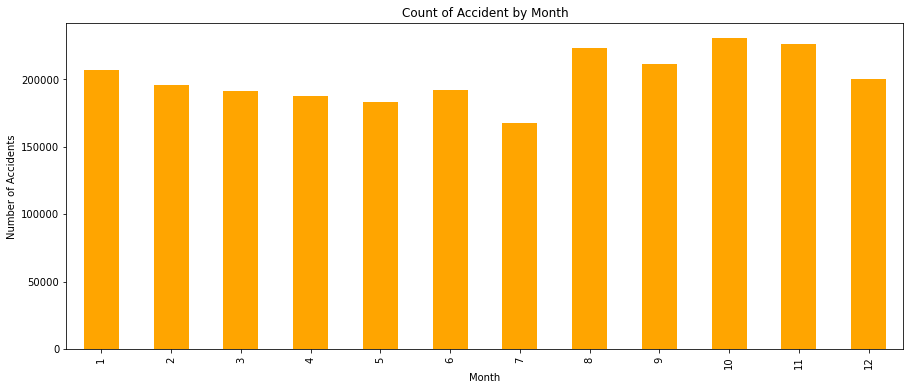

In [12]:
df.groupby('Month').size().plot(kind= 'bar',figsize=(15,6),color = 'orange')
plt.title('Count of Accident by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

Text(0, 0.5, 'Number of Accidents')

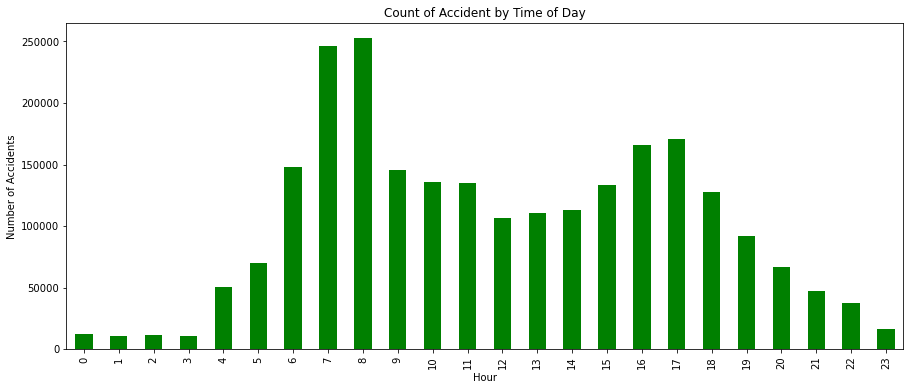

In [13]:
df.groupby('Hour').size().plot(kind= 'bar',figsize=(15,6),color ='green')
plt.title('Count of Accident by Time of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')

Text(0, 0.5, 'Number of Accidents')

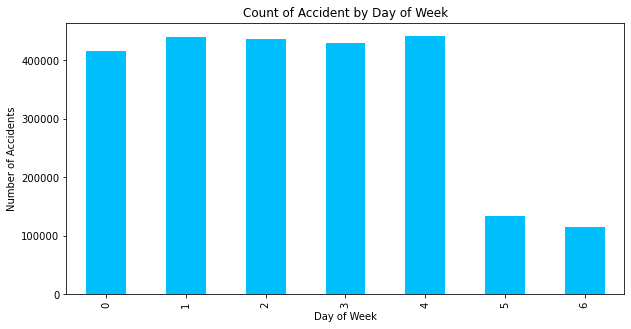

In [14]:
df.groupby('DayofWeek').size().plot(kind= 'bar',figsize=(10,5),color = 'deepskyblue')
plt.title('Count of Accident by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')

### 3.5. Dropping More Unnecessary Features

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2414301 entries, 0 to 2478817
Data columns (total 45 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   TMC                    float64
 2   Severity               int64  
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   Distance(mi)           float64
 7   Description            object 
 8   Street                 object 
 9   Side                   object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Timezone               object 
 15  Airport_Code           object 
 16  Weather_Timestamp      object 
 17  Temperature(F)         float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mph)   

1. Latitude and longitude can tell detail information of the accident location. Features about **address** are not necessary.

2. Driving ability might affected by period of day (daytime or nightime) which based on sunrise and sunset. **Civil/Nautical/Astronomical twillight** is useless.

3. Only one **timestamp** is needed. 

4. The language **descripition** of the accident will not help predict car accident. 

In [16]:
dropfeatures = ['ID','End_Time', 'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']

df = df.drop(dropfeatures, axis = 1)

### 3.6. Check How Mang Missing Values Left

In [17]:
df.isnull().sum()

TMC                       0
Severity                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
Temperature(F)        39453
Humidity(%)           42060
Pressure(in)          33897
Visibility(mi)        47554
Wind_Direction        33964
Wind_Speed(mph)      338278
Weather_Condition     47516
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Sunrise_Sunset           53
Year                      0
Month                     0
Dayofmonth                0
Hour                      0
DayofWeek                 0
dtype: int64

In [18]:
df.shape

(2414301, 30)

Dataset still contains large amount of data. Drop rows that have missing values will not affect future modeling. 

In [19]:
df.dropna(inplace = True)


In [20]:
df.shape

(2055616, 30)

### 3.7. Roughly Estimate Features Importance 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055616 entries, 2 to 2478817
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           int64  
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Temperature(F)     float64
 6   Humidity(%)        float64
 7   Pressure(in)       float64
 8   Visibility(mi)     float64
 9   Wind_Direction     object 
 10  Wind_Speed(mph)    float64
 11  Weather_Condition  object 
 12  Amenity            bool   
 13  Bump               bool   
 14  Crossing           bool   
 15  Give_Way           bool   
 16  Junction           bool   
 17  No_Exit            bool   
 18  Railway            bool   
 19  Roundabout         bool   
 20  Station            bool   
 21  Stop               bool   
 22  Traffic_Calming    bool   
 23  Traffic_Signal     bool   
 24  Sunrise_Sunset     object 
 25  Year              

In [22]:
# only apply feature importance techniques on float and int features
X = df[['TMC', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',  'Wind_Speed(mph)']]
y = df['Severity']    #target column 


#### 3.7.1 Use XGB to Find Features Importance 

In [23]:
import xgboost as xgb
xgb = xgb.XGBRegressor(verbosity=0)
xgb.fit(X, y)

score = xgb.feature_importances_.argsort()


#### 3.7.2 Use Extra-Trees to Find Features Importance 

In [24]:
from sklearn import ensemble 

extra_tree = ensemble.ExtraTreesRegressor(n_estimators=25, random_state=0)
extra_tree.fit(X,y)
importance = extra_tree.feature_importances_.argsort()

#### 3.7.3. Plot Feature Importance

Text(0.5, 0, 'Extra-Trees Feature Importance')

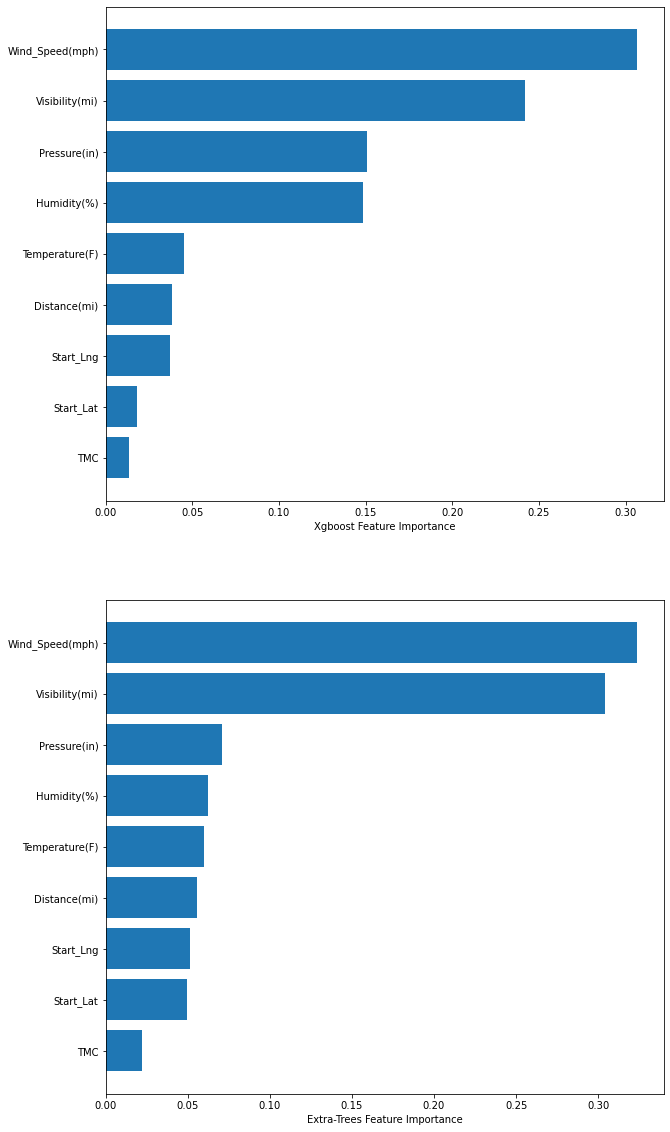

In [25]:
fig = plt.figure(figsize=(10,20))

plt.subplot(2, 1, 1)
plt.barh(X.columns, xgb.feature_importances_[score])
plt.xlabel("Xgboost Feature Importance")

plt.subplot(2, 1, 2)
plt.barh(X.columns, extra_tree.feature_importances_[importance])
plt.xlabel("Extra-Trees Feature Importance")

Figues above show that all these features are important. All these features should be keeped for later modeling. 


### 3.8. Convert Categorical Features to Numerical Values


#### 3.8.1. Covert Wind Direction

In [26]:
df['Wind_Direction'].unique()

array(['SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE', 'South',
       'Variable', 'North', 'SE', 'SSE', 'ESE', 'East', 'NE', 'ENE', 'E',
       'W', 'S', 'VAR', 'CALM', 'N'], dtype=object)

In [27]:
df = df.join(pd.get_dummies(df['Wind_Direction']))

In [28]:
df['West'] = df['West'] + df['W']
df['East'] = df['East'] + df['E']
df['North'] = df['North'] + df['N']
df['South'] = df['South'] + df['S']
df['South_West'] = df['SW'] + df['WSW'] + df['SSW']
df['SouTH_East'] = df['SE'] + df['SSE'] + df['ESE']
df['North_West'] = df['NW'] + df['NNW'] + df['WNW']
df['North_East'] = df['NE'] + df['NNE'] + df['ENE']
df['Variable'] = df['VAR'] + df['Variable']
df = df.drop(['W','S','E','N','SW','WSW','SSW','SE','SSE','ESE','NW','NNW','WNW','NE','NNE','ENE','VAR','Wind_Direction'], axis = 1)

In [29]:
df.head()

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,CALM,East,North,South,Variable,West,South_West,SouTH_East,North_West,North_East
2,201.0,2,39.063148,-84.032608,0.01,36.0,100.0,29.67,10.0,3.5,...,0,0,0,0,0,0,1,0,0,0
3,201.0,3,39.747753,-84.205582,0.01,35.1,96.0,29.64,9.0,4.6,...,0,0,0,0,0,0,1,0,0,0
4,201.0,2,39.627781,-84.188354,0.01,36.0,89.0,29.65,6.0,3.5,...,0,0,0,0,0,0,1,0,0,0
5,201.0,3,40.100590,-82.925194,0.01,37.9,97.0,29.63,7.0,3.5,...,0,0,0,0,0,0,1,0,0,0
6,201.0,2,39.758274,-84.230507,0.00,34.0,100.0,29.66,7.0,3.5,...,0,0,0,0,0,0,1,0,0,0


#### 3.8.2 Covert Weather Condition

In [30]:
df['Weather_Condition'].unique()

array(['Overcast', 'Mostly Cloudy', 'Light Rain', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle',
       'Light Rain Showers', 'Smoke', 'Patches of Fog', 'Mist',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Light Rain / Windy', 'Hail', 'Heavy Drizzle',
       'Showers in the Vicinity', 'Light Rain Shower',
       'Light Rain with Thunder', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunderstorm', 'Thunder',
       'Heavy T-Storm', 'Funnel Cloud', 'Heavy T-Storm / Windy',
       'Blowing Snow', 'Light Thunderstorms and Snow', 'Heavy Snow',
      

In [31]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), 1, 0)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), 1, 0)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), 1, 0)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), 1, 0)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), 1, 0)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), 1, 0)
df = df.drop('Weather_Condition',axis = 1)

In [32]:
df.groupby(['Clear']).count()

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,South_West,SouTH_East,North_West,North_East,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
Clear,,,,,,,,,,,,,,,,,,,,,
0,1587089,1587089,1587089,1587089,1587089,1587089,1587089,1587089,1587089,1587089,...,1587089,1587089,1587089,1587089,1587089,1587089,1587089,1587089,1587089,1587089
1,468527,468527,468527,468527,468527,468527,468527,468527,468527,468527,...,468527,468527,468527,468527,468527,468527,468527,468527,468527,468527


In [33]:
df.groupby(['Rain']).count()

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,South_West,SouTH_East,North_West,North_East,Clear,Cloud,Heavy_Rain,Snow,Heavy_Snow,Fog
Rain,,,,,,,,,,,,,,,,,,,,,
0,1890672,1890672,1890672,1890672,1890672,1890672,1890672,1890672,1890672,1890672,...,1890672,1890672,1890672,1890672,1890672,1890672,1890672,1890672,1890672,1890672
1,164944,164944,164944,164944,164944,164944,164944,164944,164944,164944,...,164944,164944,164944,164944,164944,164944,164944,164944,164944,164944


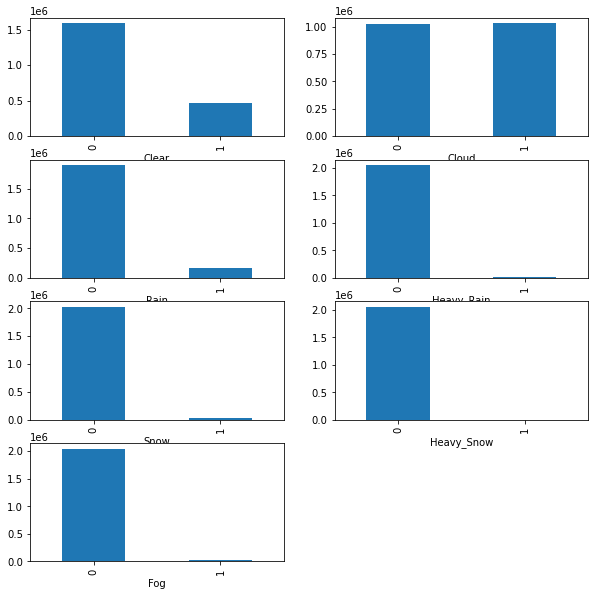

In [34]:
weather_condition = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
n = 1
plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
for i in weather_condition:
    plt.subplot(4,2,n)
    df.groupby(i)['Severity'].count().plot(kind='bar')
    n = n+1
    


#####  3.8.3. Convert Sunrise-Sunset  

In [35]:
df = df.join(pd.get_dummies(df['Sunrise_Sunset']))
df = df.drop('Sunrise_Sunset',axis = 1)

### 3.9. Covert True/False to 1/0

In [36]:
df_bool = df[['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']].astype('int',copy=True)

In [37]:
df = df.drop(['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal'],axis = 1)

In [38]:
df = pd.concat([df,df_bool],axis =1, sort = False)

In [39]:
df = df.astype('float')

In [40]:
df.head()

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
2,201.0,2.0,39.063148,-84.032608,0.01,36.0,100.0,29.67,10.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,201.0,3.0,39.747753,-84.205582,0.01,35.1,96.0,29.64,9.0,4.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,201.0,2.0,39.627781,-84.188354,0.01,36.0,89.0,29.65,6.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,201.0,3.0,40.100590,-82.925194,0.01,37.9,97.0,29.63,7.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,201.0,2.0,39.758274,-84.230507,0.00,34.0,100.0,29.66,7.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df = df.astype(float)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055616 entries, 2 to 2478817
Data columns (total 46 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TMC              float64
 1   Severity         float64
 2   Start_Lat        float64
 3   Start_Lng        float64
 4   Distance(mi)     float64
 5   Temperature(F)   float64
 6   Humidity(%)      float64
 7   Pressure(in)     float64
 8   Visibility(mi)   float64
 9   Wind_Speed(mph)  float64
 10  Year             float64
 11  Month            float64
 12  Dayofmonth       float64
 13  Hour             float64
 14  DayofWeek        float64
 15  CALM             float64
 16  East             float64
 17  North            float64
 18  South            float64
 19  Variable         float64
 20  West             float64
 21  South_West       float64
 22  SouTH_East       float64
 23  North_West       float64
 24  North_East       float64
 25  Clear            float64
 26  Cloud            float64
 27  Rain        

### Modeling

In [43]:
print(list(df.columns))

['TMC', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Year', 'Month', 'Dayofmonth', 'Hour', 'DayofWeek', 'CALM', 'East', 'North', 'South', 'Variable', 'West', 'South_West', 'SouTH_East', 'North_West', 'North_East', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog', 'Day', 'Night', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']


In [44]:
df['Severity'].unique()

array([2., 3., 1., 4.])

In [60]:
df_high_risk = df.loc[(df['Severity'] ==3) | (df['Severity'] ==4)]
df_highrisk = df_high_risk.copy()
df_highrisk.loc[:,'Severity'] = 1
df_highrisk.head(10)

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
3,201.0,1,39.747753,-84.205582,0.01,35.1,96.0,29.64,9.0,4.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,201.0,1,40.100590,-82.925194,0.01,37.9,97.0,29.63,7.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,201.0,1,39.770382,-84.194901,0.01,34.0,100.0,29.66,7.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,201.0,1,40.100590,-82.925194,0.01,37.4,100.0,29.62,3.0,4.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,201.0,1,39.952812,-83.119293,0.01,35.6,93.0,29.64,5.0,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,241.0,1,39.932709,-82.830910,0.01,37.4,100.0,29.62,3.0,4.6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,201.0,1,40.023487,-82.994888,0.01,37.0,96.0,29.63,8.0,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,201.0,1,40.042725,-82.997307,0.01,33.8,100.0,29.62,6.0,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,201.0,1,40.007626,-82.912155,0.01,26.6,86.0,29.62,1.5,8.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,201.0,1,39.978306,-82.852554,0.01,25.0,88.0,29.65,1.0,9.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_cautionn = df.loc[(df['Severity'] ==1) | (df['Severity'] ==2)]
df_caution = df_cautionn.copy()
df_caution.loc[:,'Severity'] = 0
df_caution.head(10)

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
2,201.0,0,39.063148,-84.032608,0.01,36.0,100.0,29.67,10.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,201.0,0,39.627781,-84.188354,0.01,36.0,89.0,29.65,6.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,201.0,0,39.758274,-84.230507,0.00,34.0,100.0,29.66,7.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,201.0,0,39.778061,-84.172005,0.00,33.3,99.0,29.67,5.0,1.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,201.0,0,39.737633,-84.149933,0.00,33.8,100.0,29.63,3.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,201.0,0,39.790760,-84.241547,0.01,36.0,89.0,29.65,10.0,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,201.0,0,39.972038,-82.913521,0.01,37.4,100.0,29.62,3.0,4.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,201.0,0,39.745888,-84.170410,0.01,33.8,100.0,29.63,3.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,201.0,0,39.748329,-84.224007,0.01,35.6,99.0,29.65,7.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,201.0,0,39.752174,-84.239952,0.00,36.0,89.0,29.65,10.0,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
df_1 = pd.concat([df_highrisk[:20000],df_caution[:20000]])


In [76]:
from sklearn import preprocessing
X = df_1.drop('Severity',axis = 1)

X = preprocessing.StandardScaler().fit(X).transform(X)

In [77]:
y = df_1['Severity']


In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (X,y,test_size = 0.2, random_state = 4)

### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(C=0.01,solver ='liblinear').fit(x_train,y_train)
LR_predicted= LR_model.predict(x_test) 
LR_predicted_prob = LR_model.predict_proba(x_test)


In [80]:
from sklearn import metrics
from sklearn.metrics import jaccard_score, classification_report, confusion_matrix, log_loss, f1_score
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, LR_predicted)) 
print("Jaccard score is: ",jaccard_score(y_test, LR_predicted,labels=None, pos_label=1, average='binary', sample_weight=None))
print("F1 score is: ",f1_score(y_test, LR_predicted, average = 'weighted'))
print("Log loss score is: ",log_loss(y_test, LR_predicted_prob))

Logistic Regression's Accuracy:  0.652375
Jaccard score is:  0.4661163371088501
F1 score is:  0.651618286445103
Log loss score is:  0.554576528656514


### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier 

TreeModel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
TreeModel .fit(x_train,y_train)
predTree = TreeModel .predict(x_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree)) 

DecisionTrees's Accuracy:  0.754375


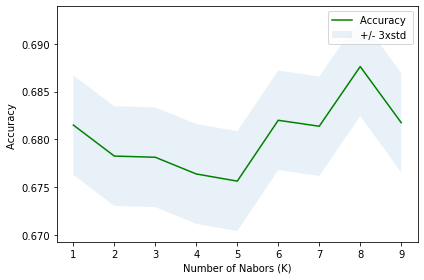

The best accuracy was with 0.687625 with k= 8


In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))  #create an array for mean accuracy
std_acc = np.zeros((Ks-1))   

for k in range(1,Ks):
    
#Train Model and Predict  
    k_nearest = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    yhat=k_nearest.predict(x_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 